In [114]:
import pandas as pd
import re
import nltk as nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
tv=TfidfVectorizer()
cv=CountVectorizer(max_features=3000)
from nltk.stem import WordNetLemmatizer
wl=WordNetLemmatizer()
from sklearn.metrics import accuracy_score,f1_score
from nltk.corpus import stopwords
import matplotlib as plt
import seaborn as sns

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [7]:
data=pd.read_csv("train.csv")

In [8]:
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [9]:
data=data.dropna()

In [10]:
data2=data.reset_index()

In [11]:
data2.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [12]:
X=data2.drop('label',axis=1)
y=data2['label']

In [14]:
corpus=[]
for i in range(len(data2)):
    r=data2['title'][i]
    r=r.lower()
    r=re.sub('[^a-zA-Z]',' ',r)
    r=re.sub('[\s]+',' ',r)
    words=r.split()
    r=[wl.lemmatize(word) for word in words if not word in stopwords.words('english')]
    r=' '.join(r)
    corpus.append(r)

In [15]:
dataset_tfidf=tv.fit_transform(corpus).toarray()
dataset_Bow=cv.fit_transform(corpus).toarray()
wv=Word2Vec(corpus,min_count=1)
#dataset_w2v=wv.fit_transform(corpus).toarray()

In [16]:
dataset_tfidf.shape

(18285, 17467)

In [17]:
dataset_Bow.shape

(18285, 3000)

In [119]:
accu1=[]
accu2=[]

###  Importing Models

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [19]:
rf=RandomForestClassifier(n_estimators=200)
gnb=GaussianNB()


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
Xtrain,Xtest,ytrain,ytest= train_test_split(dataset_Bow,y)
X2train,X2test,y2train,y2test= train_test_split(dataset_tfidf,y)


### Using BoW with RF

In [117]:
rf.fit(Xtrain,ytrain)
y_pred=rf.predict(Xtest)
print(accuracy_score(y_pred,ytest))
print(f1_score(y_pred,ytest))

0.9381014873140857
0.9317907929621595


NameError: name 'accu1' is not defined

In [120]:
accu1.append(accuracy_score(y_pred,ytest))

### Using TFIDF with RF

In [23]:
rf.fit(X2train,y2train)
y2_pred=rf.predict(X2test)
print(accuracy_score(y2_pred,y2test))
print(f1_score(y2_pred,y2test))

0.939413823272091
0.9340946942660004


In [121]:
accu2.append(accuracy_score(y2_pred,ytest))

### Using BoW with Multinomial NB

In [24]:
gnb.fit(Xtrain,ytrain)
y_pred_gnb=gnb.predict(Xtest)
print(accuracy_score(y_pred_gnb,ytest))
print(f1_score(y_pred_gnb,ytest))

0.7281277340332458
0.7330899720850333


In [122]:
accu1.append(accuracy_score(y_pred_gnb,ytest))

### Using TFIDF with Multinomial NB

In [25]:
gnb.fit(X2train,y2train)
y_pred_gnb=gnb.predict(X2test)
print(accuracy_score(y_pred_gnb,y2test))
print(f1_score(y_pred_gnb,y2test))

0.6362642169728784
0.6643794147325932


In [123]:
accu2.append(accuracy_score(y_pred_gnb,ytest))

### Using BoW with Categorical NB

In [26]:
acc=0
ind=0
for i in range(7,50):
    cnb=CategoricalNB(min_categories=i)
    cnb.fit(Xtrain,ytrain)
    y_pred_cnb=cnb.predict(Xtest)
    if(accuracy_score(y_pred_cnb,ytest)>acc):
        acc=accuracy_score(y_pred_cnb,ytest)
        ind=i
print(acc)
print(ind)

0.918416447944007
7


In [124]:
accu1.append(acc)

### Using TFIDF with Categorical NB

In [27]:
acc2=0
ind2=0
for i in range(7,50):
    cnb=CategoricalNB(min_categories=i)
    cnb.fit(X2train,y2train)
    y_pred_cnb=cnb.predict(X2test)
    if(accuracy_score(y_pred_cnb,y2test)>acc2):
        acc2=accuracy_score(y_pred_cnb,y2test)
        ind2=i
print(acc2)
print(ind2)

0.5621172353455818
7


In [125]:
accu2.append(acc2)

### Making OneHot Rep for LSTM

In [68]:
vocab=8000
onehot_rep=[one_hot(words,vocab) for words in corpus]
onehot_rep

[[4777, 7052, 1987, 288, 2916, 7347, 7826, 6512, 6096, 5858],
 [4359, 6877, 4649, 2011, 262, 714, 5522],
 [3567, 7492, 2013, 4401],
 [638, 7457, 883, 893, 7102, 2446],
 [3230, 262, 1277, 3333, 7837, 5456, 262, 7372, 7237, 3189],
 [5098,
  2782,
  609,
  5910,
  7937,
  7316,
  890,
  679,
  6673,
  1389,
  5783,
  6694,
  820,
  7776,
  5522],
 [2185, 4385, 7595, 7497, 5670, 5145, 2646, 2254, 7229, 946, 2831],
 [1283, 144, 6093, 7930, 4808, 3608, 7316, 7707, 7229, 946, 2831],
 [1319, 2382, 4062, 962, 2455, 4473, 1894, 1219, 7316, 3209],
 [1422, 3614, 1534, 2590, 5679, 5023, 6341, 4705],
 [7877, 1834, 7343, 5829, 5540, 63, 503, 3636, 1984, 6812, 6760],
 [893, 3218, 2916, 5457, 7316, 4808],
 [1045, 898, 5086, 5914, 4813, 3685, 2169, 7347, 2082],
 [6304, 7373, 453, 2160, 7779, 766, 7569, 7229, 946, 2831],
 [6676, 225, 1785, 2428, 3846, 7229, 946, 2831],
 [738, 3434, 7326, 7288, 1988, 4940, 5316, 58, 6108, 1135],
 [3488, 4317, 6877],
 [4720, 3549, 201, 6150, 7316, 4404, 2515, 5522],
 [1127

In [69]:
sent_len=20
embed_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_len)
embed_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 4777,
       7052, 1987,  288, 2916, 7347, 7826, 6512, 6096, 5858])

### Creating Model

In [90]:
vector_features=40
model=Sequential()
model.add(Embedding(vocab,vector_features,input_length=sent_len))
model.add(Dropout(0.5))
model.add(LSTM(150))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 40)            320000    
                                                                 
 dropout_8 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_6 (LSTM)               (None, 150)               114600    
                                                                 
 dropout_9 (Dropout)         (None, 150)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 151       
                                                                 
Total params: 434751 (1.66 MB)
Trainable params: 434751 (1.66 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [91]:
import numpy as np
Xfeatures=np.array(embed_docs)
Yfeatures=np.array(y)

In [92]:
X3train,X3test,y3train,y3test= train_test_split(Xfeatures,Yfeatures)

In [93]:
model.fit(X3train,y3train,validation_data=(X3test,y3test),epochs=50,batch_size=64)

Epoch 1/50
215/215 [==============================] - 15s 42ms/step - loss: 0.3296 - accuracy: 0.8490 - val_loss: 0.2121 - val_accuracy: 0.9112
Epoch 2/50
215/215 [==============================] - 11s 51ms/step - loss: 0.1553 - accuracy: 0.9393 - val_loss: 0.2188 - val_accuracy: 0.9189
Epoch 3/50
215/215 [==============================] - 11s 49ms/step - loss: 0.1116 - accuracy: 0.9582 - val_loss: 0.2003 - val_accuracy: 0.9208
Epoch 4/50
215/215 [==============================] - 9s 41ms/step - loss: 0.0877 - accuracy: 0.9692 - val_loss: 0.2200 - val_accuracy: 0.9064
Epoch 5/50
215/215 [==============================] - 9s 44ms/step - loss: 0.0691 - accuracy: 0.9744 - val_loss: 0.2461 - val_accuracy: 0.9140
Epoch 6/50
215/215 [==============================] - 10s 44ms/step - loss: 0.0523 - accuracy: 0.9812 - val_loss: 0.2852 - val_accuracy: 0.9136
Epoch 7/50
215/215 [==============================] - 11s 51ms/step - loss: 0.0460 - accuracy: 0.9832 - val_loss: 0.3371 - val_accuracy: 0

In [104]:
predictions = (model.predict(X3test) > 0.5).astype("int32")

143/143 [==============================] - 1s 8ms/step


In [107]:
print(accuracy_score(predictions,y3test))

0.905074365704287


In [138]:
algo=['RF','Multinomial NB','Categorical NB','LSTM']
accu1.append(accuracy_score(predictions,y3test))
accu2.append(accuracy_score(predictions,y3test))

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Accuracy Score for BoW'>

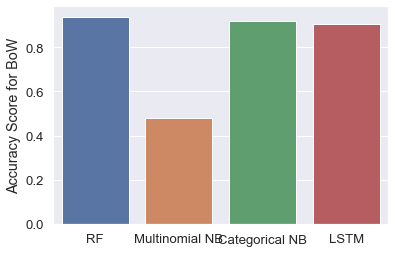

In [139]:
plt.pyplot.ylabel("Accuracy Score for BoW")
sns.set(font_scale=1.2)
sns.barplot(algo,accu1)

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Accuracy Score for TFIDF'>

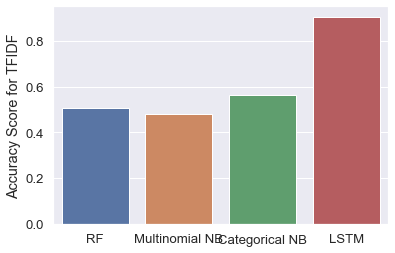

In [140]:
plt.pyplot.ylabel("Accuracy Score for TFIDF")
sns.set(font_scale=1.2)
sns.barplot(algo,accu2)

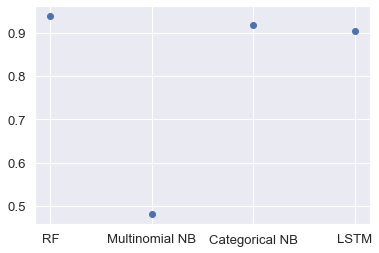

In [141]:
plt.pyplot.scatter(algo, accu1, label='BoW + ML algos', color='b')

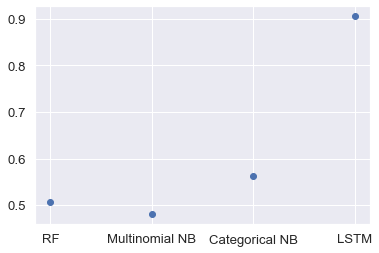

In [142]:
plt.pyplot.scatter(algo, accu2, label='TFIDF + ML algos', color='b')